<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/Day2_PA%EC%99%80_%EC%B6%94%EB%A1%A0%ED%86%B5%EA%B3%84(%EB%AC%B8%EC%A0%9C)_%EC%B5%9C%EC%88%99%EC%96%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. AARRR

### 1-1 Acqusition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 가상의 데이터 생성
np.random.seed(42)
num_users = 200

# Acquisition 채널 종류
channels = ['SEO', 'Paid Ads', 'Social Media', 'Email', 'Referral']

data = {
    'user_id': range(1, num_users + 1),
    'acquisition_channel': np.random.choice(channels, size=num_users, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    'signup_date': pd.date_range(start='2024-10-01', periods=num_users, freq='D'),
    'converted': np.random.choice([0, 1], size=num_users, p=[0.6, 0.4])  # 40% 전환율 가정
}

# 데이터프레임 생성
df = pd.DataFrame(data)
df.head(3)

,user_id,acquisition_channel,signup_date,converted
0,1,Paid Ads,2024-10-01,1
1,2,Referral,2024-10-02,0
2,3,Social Media,2024-10-03,0


#### Q1. Acquisition 채널별 사용자 분석

In [ ]:
# 2. Acquisition 채널별 사용자 수 분석  Value count를 사용하는 방법
channel_counts = df['acquisition_channel'].value_counts()
channel_counts

,count
acquisition_channel,
SEO,66
Paid Ads,50
Social Media,33
Email,32
Referral,19


In [ ]:
# 2. Acquisition 채널별 사용자 수 분석  groupby를 사용하는 방법
channel_counts = df.groupby('acquisition_channel').count()[['user_id']].sort_values('user_id', ascending = False)
channel_counts

,user_id
acquisition_channel,
SEO,66
Paid Ads,50
Social Media,33
Email,32
Referral,19


#### Q2) Acquisition 채널별 사용자수 - 데이터 시각화

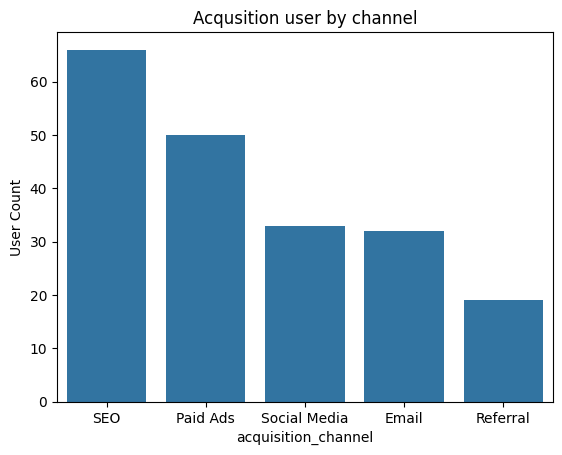

In [ ]:
# 2. 데이터 시각화 - Acquisition 채널별 사용자 수

sns.barplot(x = channel_counts.index, y = channel_counts.values)
plt.title('Acqusition user by channel')
plt.ylabel('User Count')
plt.show()

#### Q3) Acquisition 채널별 전환율 분석

In [ ]:
# 3. Acquisition 채널별 전환율 분석
conversion_rate = df.groupby('acquisition_channel')['converted'].mean().round(2)
print("Acquisition 채널별 전환율:")
print(conversion_rate)

Acquisition 채널별 전환율:
acquisition_channel
Email           0.50
Paid Ads        0.34
Referral        0.26
SEO             0.53
Social Media    0.42
Name: converted, dtype: float64


#### Q4) Acqusition 채널별 전환율

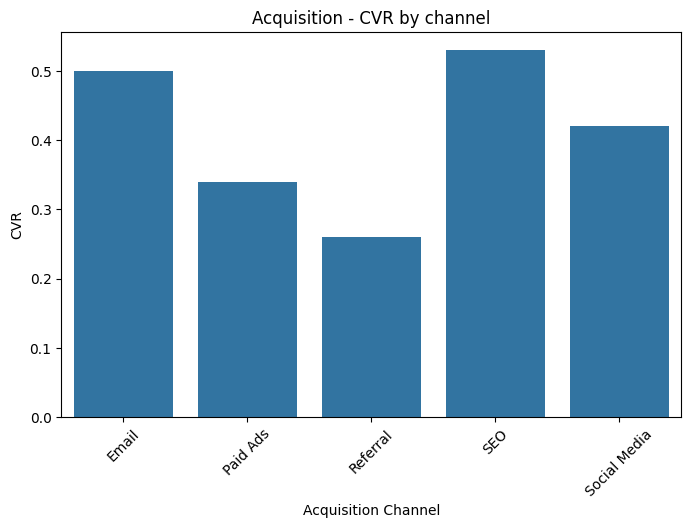

In [ ]:
# 4. 데이터 시각화 - Acquisition 채널별 전환율
plt.figure(figsize=(8, 5))

sns.barplot(x =conversion_rate.index, y = conversion_rate.values)
plt.ylabel('CVR')
plt.xlabel('Acquisition Channel')
plt.title('Acquisition - CVR by channel')
plt.xticks(rotation = 45)
plt.show()

### 1-2. Activation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 가상의 데이터 생성
np.random.seed(42)
num_users = 100
data = {
    'user_id': range(1, num_users + 1),
    'signup_date': pd.date_range(start='2024-10-01', periods=num_users, freq='D'),
    'first_search_date': pd.date_range(start='2024-10-02', periods=num_users, freq='D') + pd.to_timedelta(np.random.randint(0, 10, size=num_users), unit='D'),
    'purchase_amount': np.random.randint(0, 100000, size=num_users)
}
df = pd.DataFrame(data)
df.head(3)

,user_id,signup_date,first_search_date,purchase_amount
0,1,2024-10-01,2024-10-08,78603
1,2,2024-10-02,2024-10-06,52256
2,3,2024-10-03,2024-10-11,89135


#### Q5)  Activation 여부 컬럼 추가
- `is_activated` 컬럼: 조건: 첫 검색이 회원가입 후 7일 이내면 활성화로 간주
- `total_users` : 총 사용자수
- `activated_users`: 활성화된 사용자수
- `Activation Rate`: 활성화 %

In [ ]:
# 1. Activation 여부 컬럼 추가 (첫 검색이 회원가입 후 7일 이내면 활성화로 간주)
df['is_activated'] = (df['first_search_date'] - df['signup_date']).dt.days <=7
df['is_activated']

,is_activated
0,True
1,True
2,False
3,True
4,True
...,...
95,False
96,False
97,True
98,False


In [ ]:
# 2. Activation 지표 분석
total_users = len(df)
activated_users = df['is_activated'].sum()
activation_rate = activated_users / total_user

print(f"총 사용자 수: {total_users}")
print(f"Activation된 사용자 수: {activated_users}")
print(f"Activation Rate: {activation_rate:.2%}")

총 사용자 수: 100
Activation된 사용자 수: 62
Activation Rate: 62.00%


#### Q6) Activation 분석 시각화

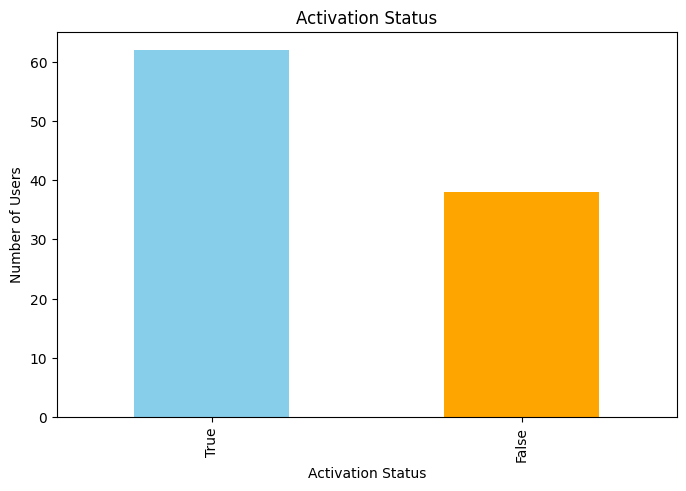

In [ ]:
# Activation 분석 결과 시각화
plt.figure(figsize=(8, 5))
df['is_activated'].value_counts().plot(kind = 'bar', color = ['skyblue','orange'])
plt.title('Activation Status')
plt.xticks(ticks= [0,1], label = ['Not Acitve', 'Active'])
plt.xlabel('Activation Status')
plt.ylabel('Number of Users')
plt.show()

#### Q7) Activation된 사용자들의 구매 금액 분석
- Activation된 사용자의 평균 구매 금액(소수점 2째짜리)
- Activation되지 않은 사용자들의 평균 구매 금액(소수점 2째짜리)

In [ ]:
# Activation된 사용자들의 구매 금액 분석

activate_df = df[df['is_activated'] == True]
non_active_df =  df[df['is_activated'] == False]

avg_purchase_activated = activate_df['purchase_amount'].mean()
avg_purchase_non_activated = non_active_df['purchase_amount'].mean()

print(f"Activation된 사용자의 평균 구매 금액: {avg_purchase_activated:.2f} 원")
print(f"Activation되지 않은 사용자의 평균 구매 금액: {avg_purchase_non_activated:.2f} 원")

Activation된 사용자의 평균 구매 금액: 55826.39 원
Activation되지 않은 사용자의 평균 구매 금액: 55457.42 원


### Google Colab -  drive연결방법

1. 하기 코드 실행을 통해서 Colab - drive 연결하기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. 데이터를 다운로드 받아서 구글 드라이브에 올리기
3. 2번에 해당하는 경로를 Colab 좌측 파일 탐색에서 찾아서 오른쪽 점세개 -> 경로복사
4. 밑에 코드에 적용하여서 데이터 불러오기

In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/아이펠Data/events.csv')
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


### 1-3. Retention

- [kaggle 데이터셋: eCommerce events history](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store)
- [분석ref](https://medium.com/@davidjwilson93/unleashing-the-power-of-cohort-analysis-with-pandas-a-step-by-step-guide-3d3fffd7a487)
- [kaggle 데이터셋에서 데이터를 url로 가져오는 방법](https://velog.io/@tngus4334/kaggle-kaggle-API-%EC%84%B8%ED%8C%85%ED%95%98%EB%8A%94%EB%B2%95)

In [6]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-electronics-store")
df = pd.read_csv(path + '/' + os.listdir(path)[0] )
df.head(3)

100%|██████████| 20.3M/20.3M [00:00<00:00, 149MB/s]

Extracting files...


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [8]:
# df = df.sample(frac = 0.01, random_state = 42)
# df.info()

- 날짜형 데이터 전처리: `event_time` -> YYYY-MM-01 식으로 변경해서 통일시켜줄 예정

In [9]:
df['current_month'] = pd.to_datetime(df['event_time']).dt.year.map(str)+ '-' + pd.to_datetime(df['event_time']).dt.month.map(str) + '-' + '01'
df['current_month'] = pd.to_datetime(df['current_month']).dt.date
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-01
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-01
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-01


In [10]:
df['cohort_month'] = df.groupby('user_id')['current_month'].transform('min')
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-01,2020-09-01
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-01,2020-09-01
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-01,2020-09-01


In [11]:
df['month_dff'] = pd.to_datetime(df['current_month']).dt.month - pd.to_datetime(df['cohort_month']).dt.month
df['year_dff'] = pd.to_datetime(df['current_month']).dt.year - pd.to_datetime(df['cohort_month']).dt.year
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,month_dff,year_dff
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-01,2020-09-01,0,0
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-01,2020-09-01,0,0
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-01,2020-09-01,0,0


In [12]:
df['cohort_index'] = df['month_dff'] + df['year_dff']*12
df[['cohort_month','cohort_index','user_id']].head(3)

,cohort_month,cohort_index,user_id
0,2020-09-01,0,1515915625519388267
1,2020-09-01,0,1515915625519380411
2,2020-09-01,0,1515915625513238515


In [13]:
cohort_counts = df.groupby(['cohort_month','cohort_index'])['user_id'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns = {'user_id':'users'}).sort_values('cohort_month')
cohort_counts_df['retention_rate'] =  cohort_counts_df['users'] / cohort_counts_df.groupby('cohort_month')['users'].transform('max')
cohort_counts_df

users  retention_rate
cohort_month cohort_index                       
2020-09-01   0             15334        1.000000
             1               955        0.062280
             2               267        0.017412
             3               119        0.007761
             4                98        0.006391
             5                72        0.004695
2020-10-01   3               444        0.005333
             2               678        0.008143
             4               279        0.003351
             0             83261        1.000000
             1              2227        0.026747
2020-11-01   0             90106        1.000000
             1              1867        0.020720
             2               792        0.008790
             3               552        0.006126
2020-12-01   0             69473        1.000000
             1              1644        0.023664
             2               710        0.010220
2021-01-01   1              2162        0.027620
             0             78278        1.000000
2021-02-01   0             70831        1.000000

In [14]:
cohort_pivot = cohort_counts_df.pivot_table(index = 'cohort_month',columns = 'cohort_index', values = 'retention_rate')
cohort_pivot

cohort_index,0,1,2,3,4,5
cohort_month,,,,,,
2020-09-01,1.0,0.062280,0.017412,0.007761,0.006391,0.004695
2020-10-01,1.0,0.026747,0.008143,0.005333,0.003351,NaN
2020-11-01,1.0,0.020720,0.008790,0.006126,NaN,NaN
2020-12-01,1.0,0.023664,0.010220,NaN,NaN,NaN
2021-01-01,1.0,0.027620,NaN,NaN,NaN,NaN
2021-02-01,1.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_month'>

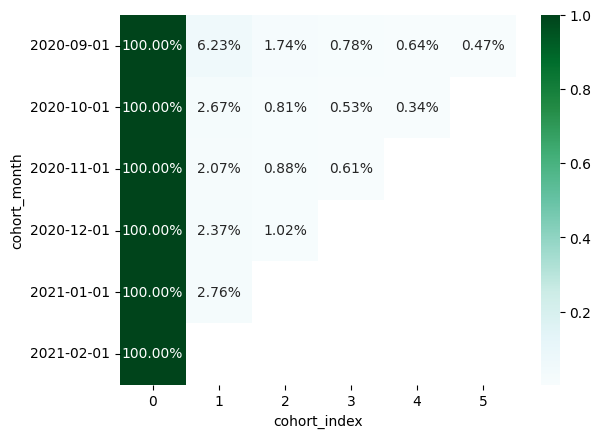

In [15]:
import seaborn as sns
sns.heatmap(data = cohort_pivot, annot = True, fmt = '.2%', cmap = 'BuGn')

- 날짜형 데이터 전처리
    - `event_time`컬럼을 문자형으로 변경 2020-09-01 형태로 변환 후 `current_month`로 변경
    - 유저별 기준으로 집계하여 최소값으로 변경 -> 코호트 시작 날짜로 통일됨

In [16]:
df['current_month'] = pd.to_datetime(df['event_time']).dt.year.map(str) + "-" + pd.to_datetime(df['event_time']).dt.month.map(str) + "-" '01'
df['current_month'] = pd.to_datetime(df['current_month']).dt.date
df["cohort_month"] = df.groupby("user_id")["current_month"].transform("min")

In [18]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,month_dff,year_dff,cohort_index
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-01,2020-09-01,0,0,0
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-01,2020-09-01,0,0,0
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-01,2020-09-01,0,0,0


- 현재년도와 월에서 코호트 년월을 빼서 corhort_index를 생성
- corhort_index를 가로축을 만들기 위한 기준

In [19]:
def cohort_index(df, col1, col2):

  current_year = pd.to_datetime(df[col1]).dt.year
  current_month = pd.to_datetime(df[col2]).dt.month
  cohort_year = pd.to_datetime(df[col1]).dt.year
  cohort_month = pd.to_datetime(df[col2]).dt.month
  return (current_year - cohort_year) * 12 + current_month - cohort_month

df['cohort_index'] = cohort_index(df, "current_month", "cohort_month")
df.tail(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,month_dff,year_dff,cohort_index
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,2021-02-01,2021-02-01,0,0,0
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,2021-02-01,2021-02-01,0,0,0
885128,2021-02-28 23:59:09 UTC,view,743182,2144415935631458761,construction.tools.soldering,kada,65.08,1515915625556087775,BejOXRngEW,2021-02-01,2020-12-01,-10,1,0


- 년월에대한 차이를 각각 계산

In [20]:
def months_diff(df, col1, col2):
    current_month = pd.to_datetime(df[col1]).dt.month
    cohort_month = pd.to_datetime(df[col2]).dt.month
    return current_month - cohort_month
def years_diff(df, col1, col2):
    current_year = pd.to_datetime(df[col1]).dt.year
    cohort_year = pd.to_datetime(df[col2]).dt.year
    return current_year - cohort_year

df['years_diff'] = years_diff(df, 'current_month', 'cohort_month')
df['months_diff'] = months_diff(df, 'current_month', 'cohort_month')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,month_dff,year_dff,cohort_index,years_diff,months_diff
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-01,2020-09-01,0,0,0,0,0
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-01,2020-09-01,0,0,0,0,0
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-01,2020-09-01,0,0,0,0,0
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-01,2020-09-01,0,0,0,0,0
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-01,2020-09-01,0,0,0,0,0


In [21]:
def cohort_index(df, col1, col2):
    return df[col1] * 12 + df[col2]

df['cohort_index'] = cohort_index(df, 'years_diff', 'months_diff')
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,current_month,cohort_month,month_dff,year_dff,cohort_index,years_diff,months_diff
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-01,2020-09-01,0,0,0,0,0
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-01,2020-09-01,0,0,0,0,0
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-01,2020-09-01,0,0,0,0,0


- 최종 행렬을 생성

In [22]:
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'user_id':'users'}).sort_values(by=['cohort_month'])
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(["cohort_month"])["users"].transform("max")
cohorts_pivot = cohort_counts_df.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')
cohorts_pivot

cohort_index,0,1,2,3,4,5
cohort_month,,,,,,
2020-09-01,1.0,0.062280,0.017412,0.007761,0.006391,0.004695
2020-10-01,1.0,0.026747,0.008143,0.005333,0.003351,NaN
2020-11-01,1.0,0.020720,0.008790,0.006126,NaN,NaN
2020-12-01,1.0,0.023664,0.010220,NaN,NaN,NaN
2021-01-01,1.0,0.027620,NaN,NaN,NaN,NaN
2021-02-01,1.0,NaN,NaN,NaN,NaN,NaN


- 데이터 시각화: heatmap

<Axes: xlabel='cohort_index', ylabel='cohort_month'>

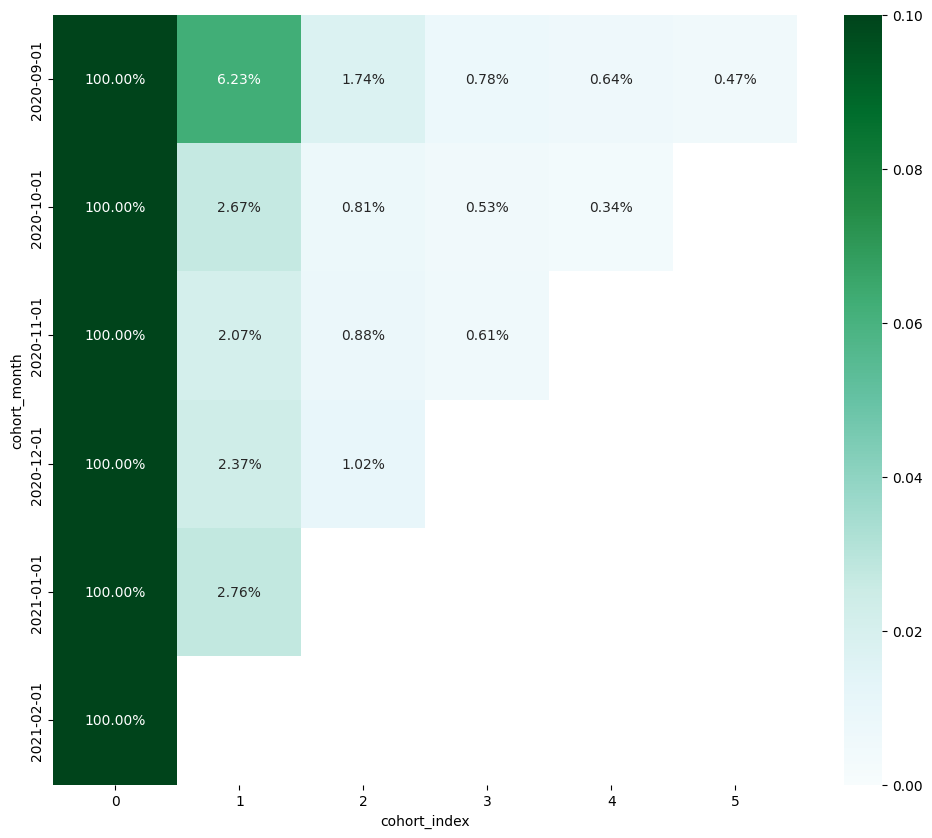

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))
sns.heatmap(data = cohorts_pivot, annot = True, fmt = '.2%', vmin = 0.0, vmax = 0.1, cmap = 'BuGn')

### 1-4. Referral

In [24]:
import pandas as pd
import numpy as np

# 가상의 데이터 생성
np.random.seed(42)
n_users = 1000
data = {
    'user_id': range(1, n_users + 1),
    'referral_source': np.random.choice(['Yes', 'No'], size=n_users, p=[0.3, 0.7]),
    'referral_code_used': np.random.choice(['Yes', 'No'], size=n_users, p=[0.4, 0.6]),
    'signup_date': pd.date_range(start='2024-01-01', periods=n_users, freq='D'),
    'purchase_amount': np.random.randint(0, 1000, size=n_users)
}

# 데이터프레임 생성
df = pd.DataFrame(data)
df.head(3)

,user_id,referral_source,referral_code_used,signup_date,purchase_amount
0,1,No,Yes,2024-01-01,219
1,2,No,No,2024-01-02,902
2,3,No,No,2024-01-03,162


#### Q8) 추천을 통해 유입된 사람의 비율을 분석
- 사용컬럼: `referral_source`

In [27]:
df['referral_source'].value_counts(normalize = True)*100

,proportion
referral_source,
No,68.1
Yes,31.9


In [29]:
# 추천을 통해 유입된 사용자 비율 분석
referral_count = df['referral_source'].value_counts(normalize=True) * 100
print("추천 유입 사용자 비율:")
print(referral_count)

추천 유입 사용자 비율:
referral_source
No     68.1
Yes    31.9
Name: proportion, dtype: float64


#### Q9) 추천 코드 사용 비율 분석
- 사용컬럼 `refferal_code_used`

In [30]:
# 2. 추천 코드 사용 비율 분석
referral_code_usage = df['referral_code_used'].value_counts(normalize = True)*100
print("\n추천 코드 사용 비율:")
print(referral_code_usage)


추천 코드 사용 비율:
referral_code_used
No     61.5
Yes    38.5
Name: proportion, dtype: float64


#### Q10) 추천 사용자의 구매 분석


In [31]:
# 3. 추천 사용자의 구매 금액 분석

referral_purchase = df[df['referral_source'] == 'Yes']['purchase_amount'].mean()
non_referral_purchase = df[df['referral_source'] == 'No']['purchase_amount'].mean()

print("추천 유입 사용자의 평균 구매 금액:", referral_purchase.round(3))
print("비추천 유입 사용자의 평균 구매 금액:", non_referral_purchase.round(3))

추천 유입 사용자의 평균 구매 금액: 513.549
비추천 유입 사용자의 평균 구매 금액: 531.107


### 1-5. Revenue
- CLV 계산하기
- [ref](https://github.com/hyunjoonbok/Python-Projects/blob/master/GeneralML/Cohort_Basket_Analysis/Measuring%20Customer%20Lifetime%20Value%20(LTV)%20in%20Python.ipynb)

In [32]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")
df = pd.read_csv(path + '/' +  os.listdir(path)[0], encoding='ISO-8859-1')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


#### Q11) CLV 계산하기

- CLV 계산방법: 고객의 평균 주문금액 * 평균구매 빈도 * (고객들의 방문일수)/365

- 절차
    - `CustomerID`의 결측행 날리기
    - `InvoiceDate` 날짜형으로 변환
    - `TotalPrice` 컬럼 만들기(`Quantity` * `UnitPrice`)
    - CLV에 해당하는 컬럼 3가지 만들기(평균 구매 금액, 평균 구매빈도 * 고객들의 방문일수)
    - 상위 10명 고객 출력
    - 전체 평균 CLV계산

In [33]:
df = df.dropna(subset = ['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [34]:
customer_data = df.groupby(['CustomerID']).agg({
    'InvoiceNo' : 'nunique',
    'TotalPrice' : 'sum',
    'InvoiceDate' :['min','max']
}).reset_index()
customer_data.head(3)

CustomerID InvoiceNo TotalPrice         InvoiceDate                    
               nunique        sum                 min                 max
0    12346.0         2       0.00 2011-01-18 10:01:00 2011-01-18 10:17:00
1    12347.0         7    4310.00 2010-12-07 14:57:00 2011-12-07 15:52:00
2    12348.0         4    1797.24 2010-12-16 19:09:00 2011-09-25 13:13:00

In [35]:
customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']
customer_data.head(3)

,CustomerID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate
0,12346.0,2,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00
1,12347.0,7,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00
2,12348.0,4,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00


- Customer Lifetime(얼만큼 기간을 지속했는가, 일)
- 구매빈도(얼만큼 자주 구매했는가)
- 평균구매금액(얼마치를 구매했는가?)

In [36]:
customer_data['lifetime'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days

In [37]:
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

In [38]:
customer_data['CLV'] =  customer_data['AverageOrderValue'] * customer_data['PurchaseFrequency']* (customer_data['lifetime']/365)

In [39]:
customer_data.head(3)

,CustomerID,PurchaseFrequency,TotalRevenue,FirstPurchaseDate,LastPurchaseDate,lifetime,AverageOrderValue,CLV
0,12346.0,2,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0,0.000000,0.000000
1,12347.0,7,4310.00,2010-12-07 14:57:00,2011-12-07 15:52:00,365,615.714286,4310.000000
2,12348.0,4,1797.24,2010-12-16 19:09:00,2011-09-25 13:13:00,282,449.310000,1388.552548


In [40]:
customer_data[['CustomerID','CLV']].sort_values('CLV', ascending = False)

,CustomerID,CLV
1703,14646.0,270300.339890
4233,18102.0,257141.061205
3758,17450.0,184400.271315
1895,14911.0,135115.108603
1345,14156.0,112452.215562
...,...,...
3103,16546.0,-21.288575
1544,14437.0,-26.396712
3829,17548.0,-60.080548
2578,15823.0,-78.317370


In [43]:
customer_data['CLV'].mean()

np.float64(1397.585753100678)

In [45]:
# 데이터 전처리
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# TotalPrice 계산 (총 매출)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 고객별 분석을 위한 데이터 준비
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',        # 구매 횟수
    'TotalPrice': 'sum',           # 총 지출 금액
    'InvoiceDate': ['min', 'max']  # 첫 구매일과 마지막 구매일
}).reset_index()

customer_data.columns = ['CustomerID', 'PurchaseFrequency', 'TotalRevenue', 'FirstPurchaseDate', 'LastPurchaseDate']

# Customer Lifetime (일 단위)
customer_data['CustomerLifetime'] = (customer_data['LastPurchaseDate'] - customer_data['FirstPurchaseDate']).dt.days

# 구매 빈도
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['PurchaseFrequency']

# CLV 계산
customer_data['CLV'] = customer_data['AverageOrderValue'] * customer_data['PurchaseFrequency'] * (customer_data['CustomerLifetime'] / 365)

# CLV 상위 10명의 고객 출력
print("CLV 상위 10명의 고객")
print(customer_data[['CustomerID', 'CLV']].sort_values(by='CLV', ascending=False).head(10))

# 전체 평균 CLV 계산
average_clv = customer_data['CLV'].mean()
print(f"\n전체 고객의 평균 CLV: {average_clv:.2f}")


CLV 상위 10명의 고객
      CustomerID            CLV
1703     14646.0  270300.339890
4233     18102.0  257141.061205
3758     17450.0  184400.271315
1895     14911.0  135115.108603
1345     14156.0  112452.215562
55       12415.0  106098.810548
3801     17511.0   89332.576986
3202     16684.0   63725.765041
1005     13694.0   63339.709315
2192     15311.0   60721.681699

전체 고객의 평균 CLV: 1397.59


#### Q12) 히스토그램 시각화하기

- 히스토그램 그리기
- 데이터는 고객의 CLV 컬럼
- plt.xlim(0,5000)으로 하여 제한

In [46]:
customer_data['CLV'].describe()

,CLV
count,4372.000000
mean,1397.585753
std,8011.603023
min,-692.794795
25%,0.000000
50%,162.396438
75%,923.844521
max,270300.339890


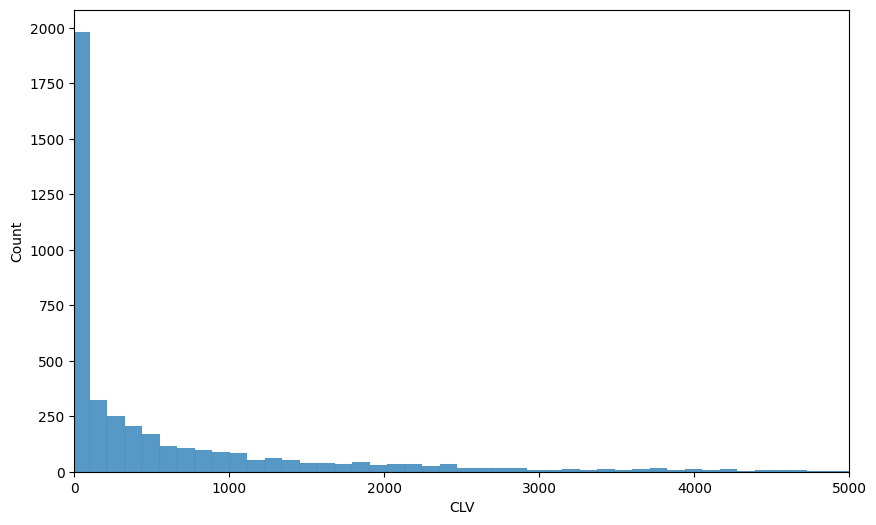

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(customer_data['CLV'])
plt.xlim(0,5000)
plt.show()

## 2. 기본분포

#### 균등분포
- 0과 1사이의 균등분포 10개 생성
- 함수명: uniform.rvs
- `rvs`함수: Random Variated Sampling의 약자로 표본데이터를 사용하는 기능으로 사용( Numpy.random 모듈과 같은 존재)

In [48]:
from scipy.stats import *
uniform.rvs(size = 10)

array([0.47684347, 0.68772204, 0.72270696, 0.69253243, 0.13443513,
       0.29939559, 0.35871553, 0.80443721, 0.27875987, 0.21070496])

### 2. 베르누이분포
- 동전을 10번 던져서 나오는 앞면의 데이터수

In [49]:
bernoulli.rvs(0.5, size = 10)

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

### 3. 이항분포
- 동전 3번을 던졌을때 2번이 앞면이 나오는 경우를 확률계산해봅시다.

In [50]:
binom.pmf(2, 3, 0.5)

np.float64(0.3750000000000001)

### 4. 정규분포
- SAT점수는 평균이 1150점이고 표준편차가 150점이다. 그러면 1380점을 맞은 임정은 상위 몇퍼센트인가?

In [52]:
pct = (1 - norm.cdf(1380, loc = 1150, scale = 150)) *100
print(f'임정의 SAT 점수는 {pct:.3f}% 입니다.')

임정의 SAT 점수는 6.260% 입니다.


In [53]:
from scipy.stats import uniform

# 균등 분포 생성 (예시: 0에서 1 사이)
uniform_dist = uniform.rvs(size=10, loc=0, scale=1)

# 결과 출력 (선택 사항)
uniform_dist

array([0.14285029, 0.75342792, 0.76892278, 0.65854052, 0.76611593,
       0.84592144, 0.61360411, 0.08860471, 0.48762781, 0.07764933])

### 2. 베르누이 분포
- 동전을 10번 던져 나오는 앞면의 데이터 수
- 함수명 `bernoulli.rvs`

In [54]:
from scipy.stats import bernoulli

# p는 성공 확률 (0과 1 사이)
p = 0.5

# size는 생성할 샘플의 개수
size = 10

# 베르누이 분포 샘플 생성
samples = bernoulli.rvs(p, size=size)

samples

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

### 3. 이항분포
- 동전 3개를 던졌을때 앞면 2개, 뒷면 1개나 나오는 확률 계산
- 함수명 `binom.pmf`
- `pmf`함수: Probability Density Function은 확률 밀도 함수로, 특정 값에서 확률을 계산할 때 사용

In [55]:
from scipy.stats import binom

# n: 시행 횟수 (동전 3개 던지기)
# p: 성공 확률 (앞면이 나올 확률, 0.5로 가정)
# k: 성공 횟수 (앞면이 2개 나올 경우)

n = 3
p = 0.5
k = 2

# 이항 분포 확률 계산
probability = binom.pmf(k, n, p)

print(f"동전 3개를 던졌을 때 앞면이 2개, 뒷면이 1개 나올 확률: {probability}")

동전 3개를 던졌을 때 앞면이 2개, 뒷면이 1개 나올 확률: 0.3750000000000001


### 4. 정규분포
- 함수명: `norm.cdf`
- `cdf`함수: Cumulative Distribution Function 누적분포함수로, 특정 K값 이하의 확률을 계산할때 사용
    - ex) `norm.cdf(x,loc,scale)`: 정규분포 평균이 loc, 표준편차가 scale일때의 x값까지의 누적확률

In [56]:
from scipy.stats import norm

# 1380점에 대한 백분율 계산
percentile = norm.cdf(1380, loc=1150, scale=150) * 100

print(f"SAT 점수 1380점의 백분율은 약 {percentile:.2f}% 입니다.")

SAT 점수 1380점의 백분율은 약 93.74% 입니다.


### Q13) 균등분포 문제
- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다.
고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [57]:
import numpy as np

# 균등분포를 따르는 대기시간 샘플링 (5~15분 사이에서 100명 무작위 생성)
np.random.seed(42)
waiting_times = np.random.uniform(5, 15, 100)

# 평균 및 표준편차 계산
mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times, ddof=1)  # 샘플 표준

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 9.70
표준편차: 2.97


### Q14) 베르누이 분포 문제
- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다.
10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [58]:
from scipy.stats import bernoulli

# 성공 확률과 시행수 정의
outcomes = bernoulli.rvs(0.3, size=10)

# 베르누이 분포 샘플 생성
success_count = np.sum(outcomes)


print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 0 1 0 0 1 0 0]
성공 횟수: 2


### Q15) 이항분포 문제
- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다.
각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [59]:
from scipy.stats import binom

n = 5
p = 0.7
k = 20

# 각 학생의 점수 시뮬레이션
scores = binom.rvs(n, p, size=k)

#평균점수
average_score = np.mean(scores)


print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [4 5 2 3 3 2 3 4 2 3 3 2 4 5 4 4 3 2 5 4]
평균 점수: 3.35


### Q16) 정규분포 문제
- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산하세요. 무게 분포의 히스토그램을 그리세요.

- `weights`: 샘플 생성하여 저장하는 자료형 변수

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규 분포 파라미터: 평균, 표준편차, 데이터 샘플 수
mu = 50
sigma = 5
num_of_samples = 1000

# 샘플 생성
weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=0)
print(np.shape(weights))

# 45g 이상 55g 이하의 비율 계산
conds = (weights >= 45) & (weights <=55)
print(np.shape(weights[conds]))

within_range = len(weights[conds]) / len(weights)
print(f'45g 이상 55g 이하의 비율 계산: {within_range:.2f}')

(1000,)
(699,)
45g 이상 55g 이하의 비율 계산: 0.70


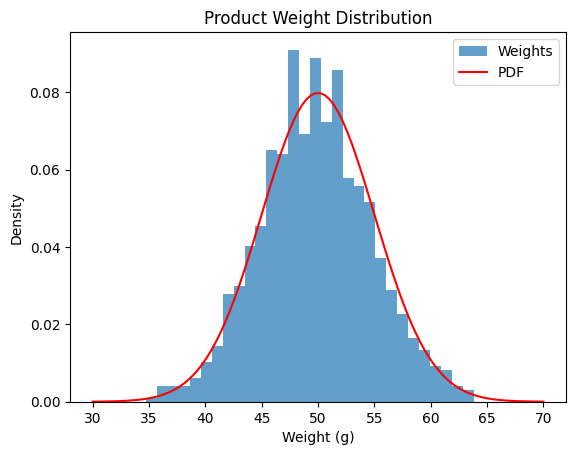

45g 이상 55g 이하 비율: 69.90%


In [61]:
# 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")